In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [271]:
df_sales = df.groupby('date')['sales'].sum()
df_sales

date
2013-01-01      2511.618999
2013-01-02    496092.417944
2013-01-03    361461.231124
2013-01-04    354459.677093
2013-01-05    477350.121229
                  ...      
2017-08-11    826373.722022
2017-08-12    792630.535079
2017-08-13    865639.677471
2017-08-14    760922.406081
2017-08-15    762661.935939
Name: sales, Length: 1684, dtype: float64

In [15]:
df2 = pd.read_csv('oil.csv')
df2

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [273]:
df_comparison = pd.merge(df_sales, df2, on= 'date')
df_comparison = df_comparison.dropna().reset_index(drop=True)
df_comparison

,date,sales,dcoilwtico
0,2013-01-02,496092.417944,93.14
1,2013-01-03,361461.231124,92.97
2,2013-01-04,354459.677093,93.12
3,2013-01-07,336122.801066,93.20
4,2013-01-08,318347.777981,93.21
...,...,...,...
1158,2017-08-09,734139.674010,49.59
1159,2017-08-10,651386.911970,48.54
1160,2017-08-11,826373.722022,48.81
1161,2017-08-14,760922.406081,47.59


In [275]:
correlation = df_comparison['sales'].corr(df_comparison['dcoilwtico'])
correlation

-0.7050015324800484

In [277]:
df_comparison.reset_index(inplace=True)
df_comparison.columns

Index(['index', 'date', 'sales', 'dcoilwtico'], dtype='object')

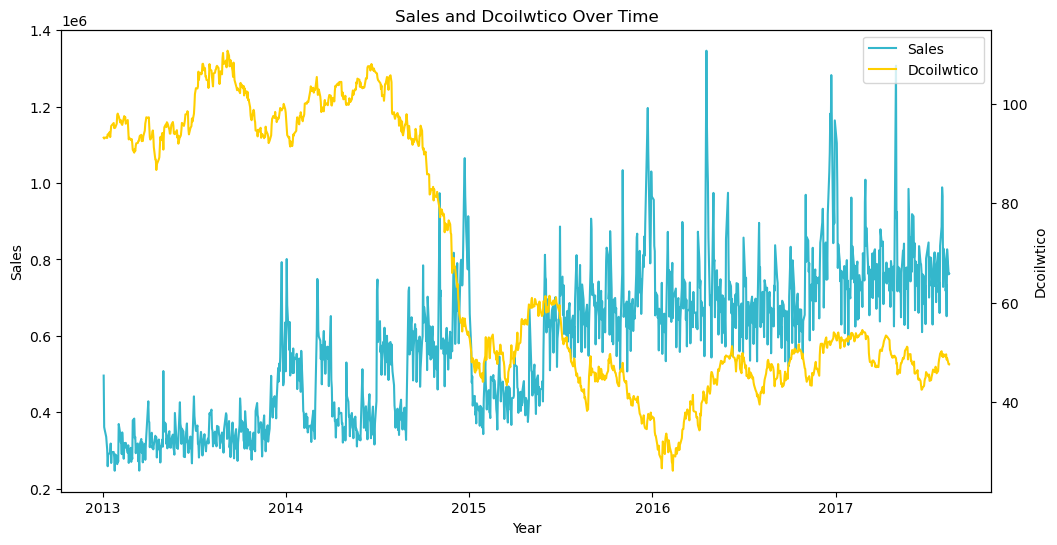

In [281]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df_comparison['date'] = pd.to_datetime(df_comparison['date'])
df_comparison.set_index('date', inplace=True)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(df_comparison.index, df_comparison['sales'], color='#34b7cc', label='Sales')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales', color='#000000')
ax1.tick_params(axis='y', labelcolor='#000000')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2 = ax1.twinx()
ax2.plot(df_comparison.index, df_comparison['dcoilwtico'], color='#ffcf00', label='Dcoilwtico')
ax2.set_ylabel('Dcoilwtico', color='#000000')
ax2.tick_params(axis='y', labelcolor='#000000')

plt.title('Sales and Dcoilwtico Over Time')
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
plt.show()

In [127]:
df3 = pd.read_csv('transactions.csv')
df3

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [119]:
df4 = pd.read_csv('stores.csv')

In [261]:
df3_sum = df3.groupby('store_nbr')['transactions'].median()
df_stores = pd.merge(df3_sum, df4[['store_nbr', 'cluster']], on= 'store_nbr')
df_stores

,store_nbr,transactions,cluster
0,1,1746.0,13
1,2,1889.0,13
2,3,3100.5,8
3,4,1455.0,9
4,5,1379.0,4
5,6,1729.0,13
6,7,1790.0,8
7,8,2740.5,8
8,9,2045.0,6
9,10,962.0,15


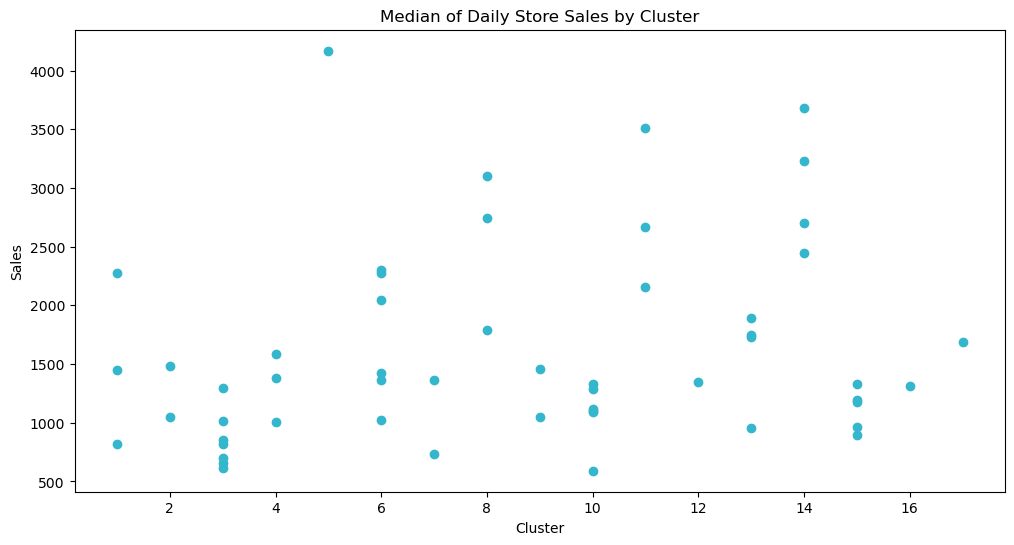

In [283]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df_stores['cluster'], df_stores['transactions'], color='#34b7cc')
plt.xlabel('Cluster')
plt.ylabel('Sales')
plt.title('Median of Daily Store Sales by Cluster')
plt.show()

In [253]:
df_family_sales = df.groupby(['store_nbr','family'])['sales'].median()
df_family_sales = df_family_sales.reset_index()
df_family_sales = pd.DataFrame(df_family_sales)
df_family_sales

,store_nbr,family,sales
0,1,AUTOMOTIVE,3.0000
1,1,BABY CARE,0.0000
2,1,BEAUTY,2.0000
3,1,BEVERAGES,1674.0000
4,1,BOOKS,0.0000
...,...,...,...
1777,54,POULTRY,49.1755
1778,54,PREPARED FOODS,60.0000
1779,54,PRODUCE,426.0050
1780,54,SCHOOL AND OFFICE SUPPLIES,0.0000


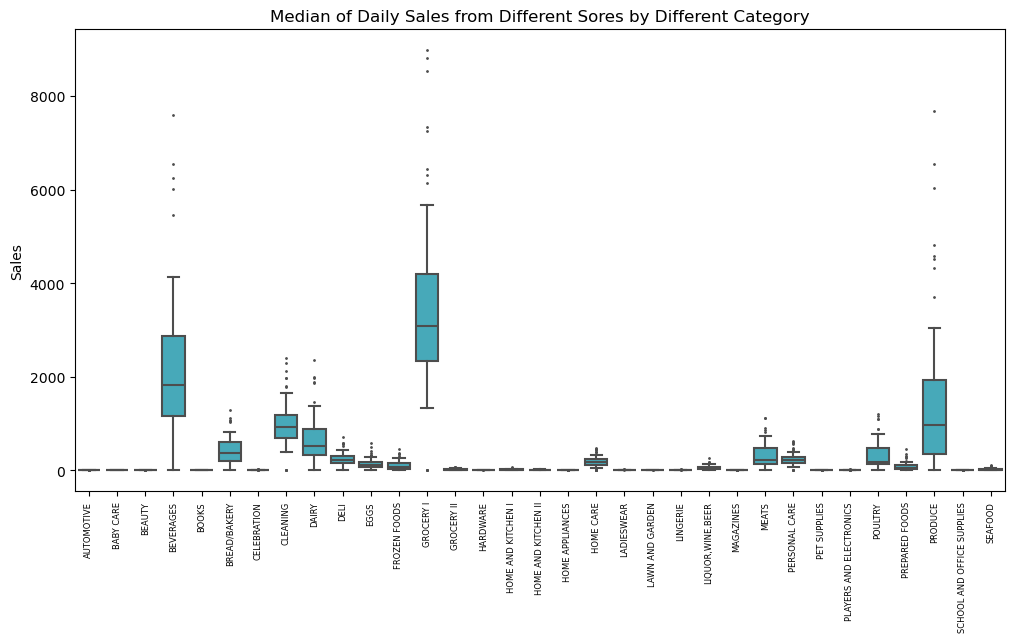

In [285]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_family_sales, x='family', y='sales', color='#34b7cc', whis=1, flierprops=dict(marker='o', markersize=1))
plt.ylabel('Sales')
plt.xlabel('')
plt.title('Median of Daily Sales from Different Sores by Different Category')
plt.xticks(rotation=90, fontsize=6)
plt.show()


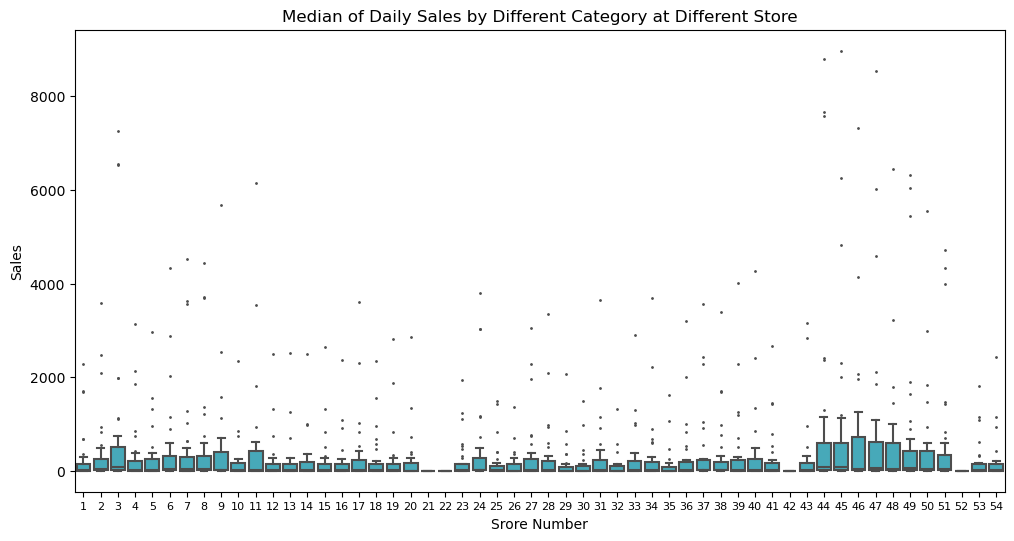

In [287]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_family_sales, x='store_nbr', y='sales', color='#34b7cc', whis=1, flierprops=dict(marker='o', markersize=1))
plt.xlabel('Srore Number')
plt.ylabel('Sales')
plt.title('Median of Daily Sales by Different Category at Different Store')
plt.xticks(fontsize=8)
plt.show()

In [229]:
df_promotion = df.groupby('onpromotion')['sales'].median()
df_promotion = df_promotion.reset_index()
df_promotion = pd.DataFrame(df_promotion)
df_promotion

,onpromotion,sales
0,0,3.0000
1,1,145.3480
2,2,245.3115
3,3,325.3910
4,4,346.0000
...,...,...
357,719,6681.0000
358,720,6154.0000
359,722,5846.0000
360,726,6044.0000


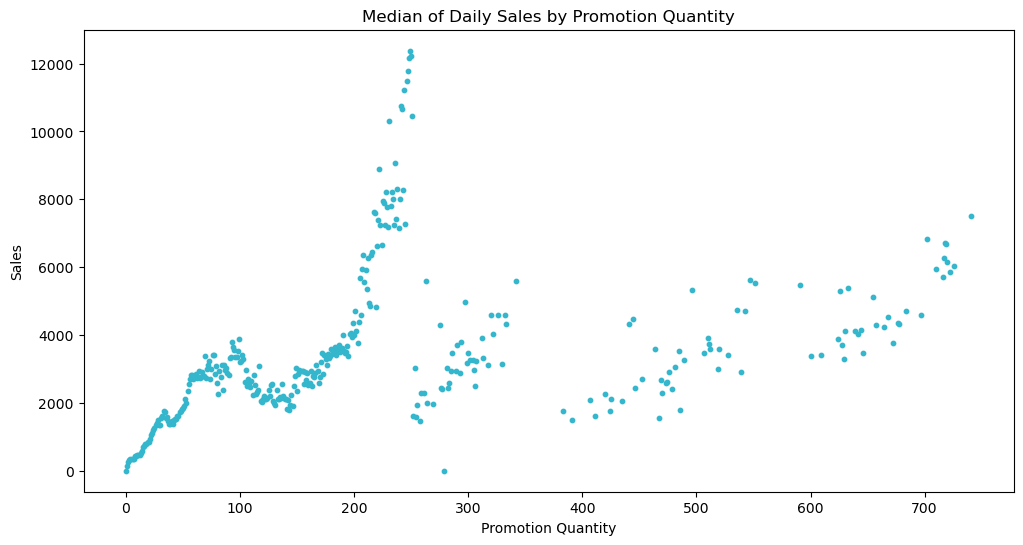

In [289]:
plt.figure(figsize=(12, 6))
plt.scatter(df_promotion['onpromotion'], df_promotion['sales'], color='#34b7cc', s=10)
plt.xlabel('Promotion Quantity')
plt.ylabel('Sales')
plt.title('Median of Daily Sales by Promotion Quantity')
plt.show()